<a href="https://colab.research.google.com/github/HaaniaSiddiqui/Poet-Attribution-Using-Deep-Learning/blob/main/ML_models_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Import Plotting Libararies
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import TextVectorization

In [ ]:
shayari = pd.read_csv("data3.txt", encoding='utf-16', header=None, sep=',', names=['text','labels'])
shayari.head()
shayari['labels'].value_counts()

مير تقی میر         2971
مرزا غالب           1934
ریاضؔ خیرآبادی      1700
نظیر اکبر آبادی     1643
جون ایلیا           1470
حیدر علی آتش        1330
ظفر اقبال           1104
احمد فراز            926
سراج اورنگ آبادی     860
علامہ اقبال          797
قتیل شفائی           780
پروین شاکر           593
منیر نیازی           523
فیض احمد فیض         504
ندا فاضلی            474
Name: labels, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1729 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1556 missing from current font.
  font.set_text(s, 0, flags=flags)


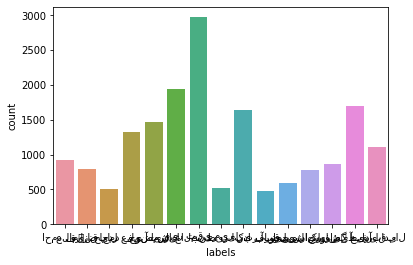

In [ ]:
sns.countplot( x = 'labels', data = shayari );

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(shayari['couplet'], shayari['label'], test_size = 0.20, random_state = 0)
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)

Shape of X_train (14092,)
Shape of X_test (3524,)
Shape of Y_train (14092,)
Shape of Y_test (3524,)


In [ ]:
max_feature_num = 500000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
print(train_vecs[0])
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)

  (0, 9331)	0.2789911181905023
  (0, 12173)	0.09091511198044429
  (0, 12185)	0.23048913279168542
  (0, 11181)	0.370063424502795
  (0, 11133)	0.18392092463714604
  (0, 9115)	0.15010062099028068
  (0, 8468)	0.755413173283557
  (0, 3232)	0.2527458299283755
  (0, 268)	0.18149269967971152


In [ ]:
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100000)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

In [ ]:
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)

In [ ]:
def DT_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    DT = DecisionTreeClassifier(max_depth = 9, random_state = 23 )
    DT.fit(train_vecs, Y_train)

    # Testing
    test_predictionDT = DT.predict(test_vecs)
    return classification_report(test_predictionDT, Y_test), confusion_matrix(test_predictionDT, Y_test) 

In [ ]:
def XGB_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    XGB = xgb.XGBClassifier(colsample_bytree = 0.2, learning_rate = 0.01, n_estimators = 100)
    XGB.fit(train_vecs, Y_train)

    # Testing
    test_predictionXGB = XGB.predict(test_vecs)
    return classification_report(test_predictionXGB, Y_test), confusion_matrix(test_predictionXGB, Y_test)  

In [ ]:
def RF_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    RF = RandomForestClassifier(n_estimators = 450, max_depth=9, random_state=43)
    RF.fit(train_vecs, Y_train)

    # Testing
    test_predictionRF = RF.predict(test_vecs)
    return classification_report(test_predictionRF, Y_test), confusion_matrix(test_predictionRF, Y_test)

In [ ]:
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of SVM Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           1       0.56      0.53      0.54       199
           2       0.69      0.70      0.69       143
           3       0.31      0.51      0.39        70
           4       0.69      0.58      0.63       277
           5       0.61      0.55      0.58       308
           6       0.65      0.64      0.64       387
           7       0.71      0.64      0.67       661
           8       0.41      0.56      0.47        75
           9       0.72      0.74      0.73       342
          10       0.48      0.60      0.53        82
          11       0.31      0.53      0.39        72
          12       0.51      0.53      0.52       147
          13       0.72      0.92      0.81       142
          14       0.75      0.66      0.70       390
          15       0.66      0.67      0.66       229

    accuracy                           0.64      3524
   macro avg       0.59      0.62

In [ ]:
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           1       0.48      0.59      0.53       153
           2       0.51      0.85      0.64        87
           3       0.15      0.82      0.26        22
           4       0.66      0.55      0.60       274
           5       0.60      0.48      0.53       350
           6       0.67      0.62      0.65       410
           7       0.80      0.53      0.64       899
           8       0.24      0.89      0.37        27
           9       0.68      0.68      0.68       351
          10       0.31      0.78      0.45        41
          11       0.23      0.65      0.34        43
          12       0.35      0.63      0.45        84
          13       0.67      0.99      0.80       122
          14       0.75      0.59      0.66       434
          15       0.61      0.62      0.61       227

    accuracy                           0.60      3524
   macro avg     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
class_report , conf_matrix = DT_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Decision Tree Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Decision Tree Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           1       0.13      0.93      0.23        27
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.06      0.79      0.11        29
           7       0.99      0.18      0.31      3251
           8       0.12      1.00      0.21        12
           9       0.15      1.00      0.26        53
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.49      1.00      0.66        89
          14       0.08      1.00      0.15        27
          15       0.14      1.00      0.25        33

    accuracy                           0.24      3524
   macro avg       0.14

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_report , conf_matrix = XGB_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Xgboost Classifier on TF-IDF Vectorizer')
print(class_report)
print(conf_matrix)

Results of Xgboost Classifier on TF-IDF Vectorizer
              precision    recall  f1-score   support

           1       0.15      0.80      0.25        35
           2       0.19      0.93      0.32        30
           3       0.07      0.80      0.13        10
           4       0.14      0.52      0.22        61
           5       0.20      0.33      0.25       168
           6       0.28      0.63      0.39       166
           7       0.91      0.21      0.34      2607
           8       0.12      1.00      0.21        12
           9       0.30      0.76      0.43       141
          10       0.01      1.00      0.02         1
          11       0.02      1.00      0.05         3
          12       0.10      0.94      0.19        17
          13       0.58      1.00      0.73       105
          14       0.26      0.72      0.38       123
          15       0.18      0.93      0.30        45

    accuracy                           0.33      3524
   macro avg       0.23      